# Music Classification

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import minmax_scale

import librosa
import librosa.display

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# !pip install librosa

### 1. Analyzing a sample audio in the Dataset
We will work with a sample from our dataset, extract all its features, and explain the importance of each feature.

In [110]:
# Path to a specific audio file
audio_path = r"YOUR_AUDIO_FILE_PATH.wav" # e.g. r"C:\path\to\your\Data\genres_original\blues\blues.00000.wav"

In [73]:
audio, sr = librosa.load(audio_path)
# each element in audio is between -1 and 1 
# 1 represents highest amplitube
# -1 represents lowest amplitude
# 0 represents silence or no amplitute

In [74]:
len(audio)/30, sr # as we have 30 secs audio and len audio will give no. of samples

(22059.8, 22050)

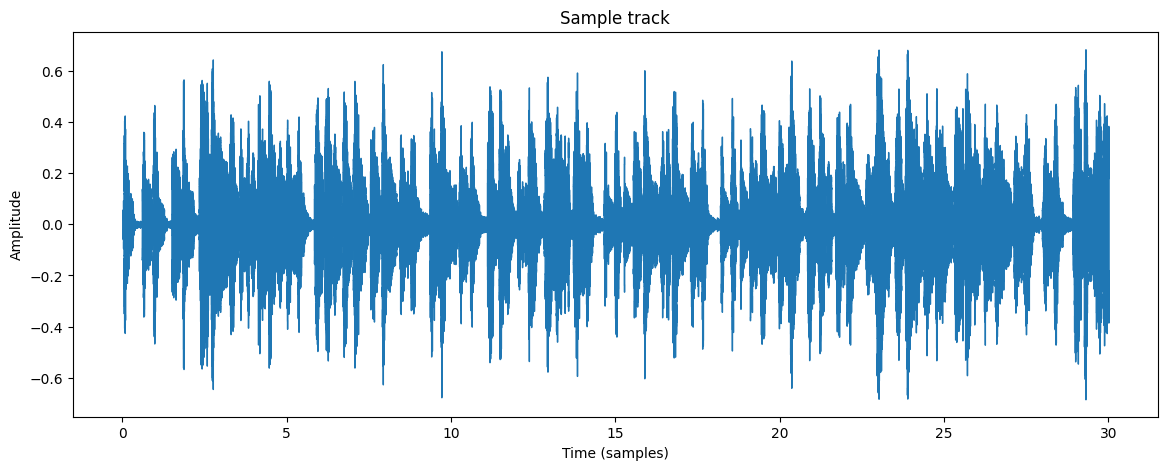

In [75]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Sample track')
plt.show()

#### 1.1 Chroma STFT (Short-Time Fourier Transform)
**Chroma STFT (Short-Time Fourier Transform)**: Measures the intensity of different pitches in a music track, providing a representation of the audio in terms of its harmonic content across 12 different pitch classes.

In [76]:
chroma_stft = librosa.feature.chroma_stft(y=audio ,sr=sr)

In [77]:
chroma_stft.mean(), chroma_stft.var()

(0.3408494, 0.09497618)

In [114]:
chroma_stft[0]

array([0.36823648, 0.8158752 , 1.        , ..., 0.83394843, 1.        ,
       1.        ], dtype=float32)

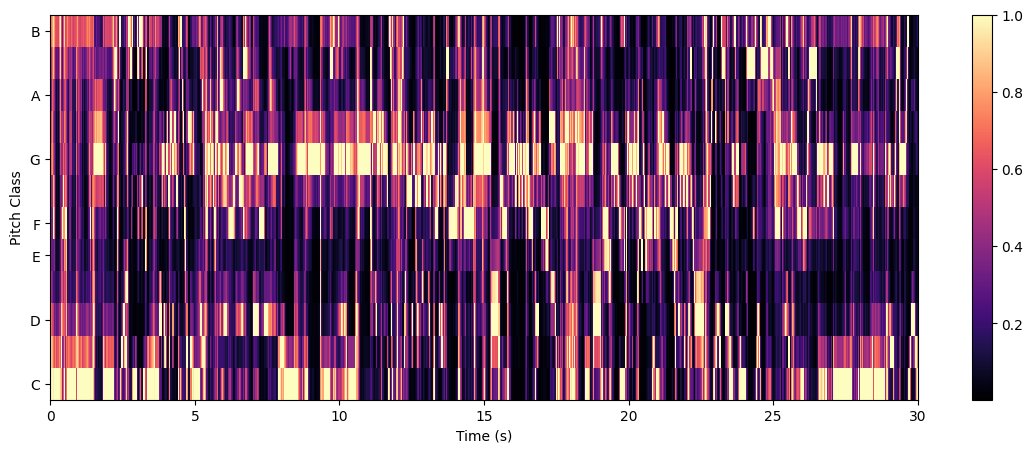

In [78]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma_stft,x_axis='time',y_axis='chroma',sr = sr)
plt.xlabel("Time (s)")
plt.ylabel("Pitch Class")
plt.colorbar()
plt.show()

#### 1.2 RMS (Root Mean Squared) Mean
**RMS (Root Mean Square)**: Indicates the average power or loudness of the audio signal.

The RMS of an audio signal can be defined as:

$$
RMS = \sqrt{\frac{1}{N} \sum_{i=1}^{N} x_i^2}
$$

Where:
- $( N )$ is the total number of samples.
- $( x_i )$ is the amplitude of the $( i^{th} )$ sample.

In [79]:
# In librosa the audio is divided into frames and rms is calculated for each frame
rms = librosa.feature.rms(y=audio)

In [120]:
rms

array([[0.04788139, 0.10656705, 0.14316952, ..., 0.13760294, 0.12718666,
        0.10523266]], dtype=float32)

In [80]:
rms.mean(), rms.var()

(0.09590782, 0.00237272)

#### 1.3 Spectral Centroid Mean
**Spectral Centroid Mean**: Represents the "center of mass" of the spectrum, giving a sense of the brightness of a sound.

In [81]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio,sr=sr)

In [82]:
spectral_centroids.mean(),spectral_centroids.var()

(1530.2617668815155, 375915.50852199737)

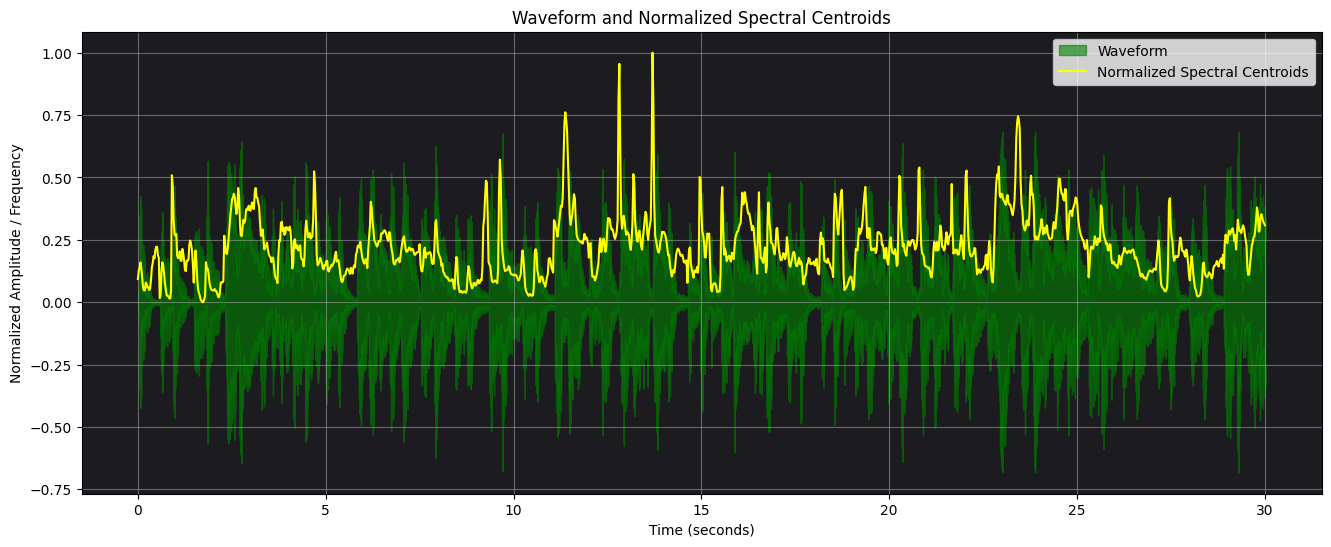

In [83]:
frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames, sr=sr)

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

plt.figure(figsize=(16, 6))

ax = plt.axes()
ax.set_facecolor('#1C1B1F')  

librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='green', label='Waveform')
plt.plot(t, normalize(spectral_centroids[0]), color='yellow', label='Normalized Spectral Centroids')

plt.title('Waveform and Normalized Spectral Centroids')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Amplitude / Frequency')
plt.legend()
plt.grid(True,alpha=0.5)

plt.show()

#### 1.4 Spectral Bandwidth
**Spectral Bandwidth**: Measures the width of the band of light at half the peak maximum and effectively indicates the range of frequencies present in the sound.

In [84]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio,sr=sr)

In [125]:
spectral_bandwidth

array([[1322.56608095, 1750.98898746, 1915.93500528, ..., 2455.6936709 ,
        2474.43647259, 2504.7100101 ]])

In [85]:
spectral_bandwidth.mean(),spectral_bandwidth.var()

(2038.987608168796, 213905.10295057186)

#### 1.5 Spectral Rolloff
**Spectral Rolloff**: The frequency below which a specified percentage (typically 85% to 95%) of the total spectral energy lies, highlighting the shape of the audio spectrum. (default 85% in librosa)

In [130]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio,sr=sr)

In [131]:
spectral_rolloff

array([[1625.75683594, 2260.98632812, 2723.95019531, ..., 5749.36523438,
        5695.53222656, 5544.79980469]])

In [87]:
spectral_rolloff.mean(),spectral_rolloff.var()

(3550.7136156830047, 2978310.9040219653)

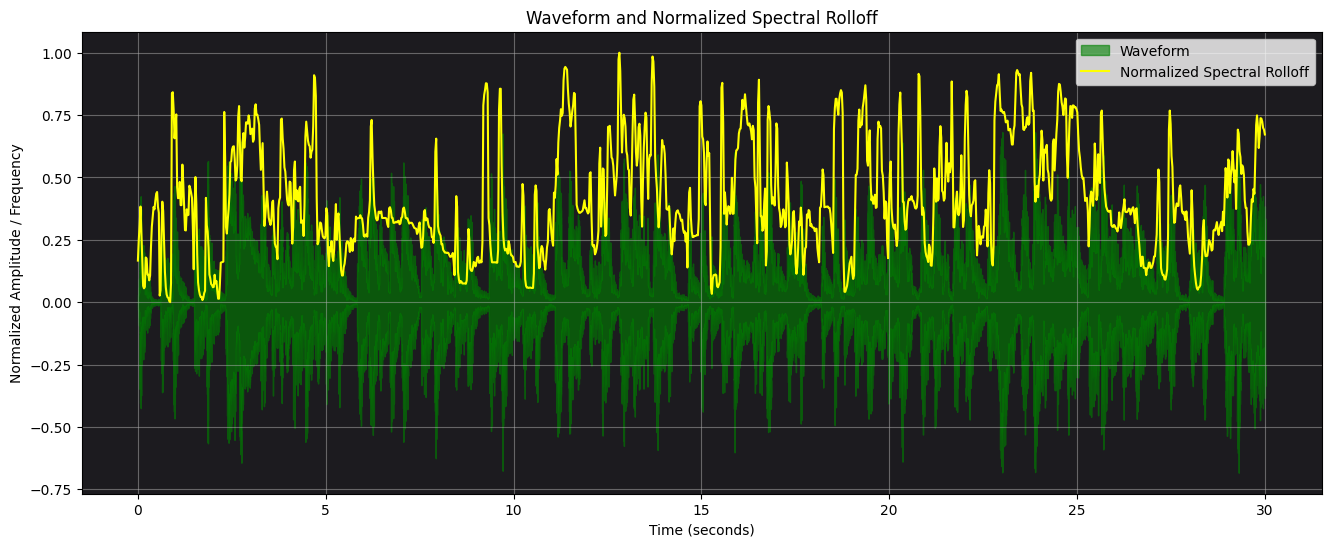

In [88]:
frames = range(len(spectral_rolloff[0]))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(16, 6))

ax = plt.axes()
ax.set_facecolor('#1C1B1F')  

librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='green', label='Waveform')
plt.plot(t, normalize(spectral_rolloff[0]), color='yellow', label='Normalized Spectral Rolloff')

plt.title('Waveform and Normalized Spectral Rolloff')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Amplitude / Frequency')
plt.legend()
plt.grid(True,alpha=0.5)

plt.show()

#### 1.6 Zero Crossing Rate
**Zero Crossing Rate**: The rate at which the signal changes signs, which can indicate the noisiness or the complexity of a sound.

In [89]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio) 

In [133]:
zero_crossing_rate

array([[0.015625  , 0.01806641, 0.02148438, ..., 0.0703125 , 0.05908203,
        0.04199219]])

In [90]:
zero_crossing_rate.mean(),zero_crossing_rate.var()

(0.05603980870552978, 0.001447521491359064)

#### 1.7 Harmony Mean
**Harmony Mean**: Extracts the harmonic components of the audio, which are important for the perception of musical notes.

In [91]:
harmonic = librosa.effects.harmonic(audio)

In [134]:
harmonic

array([ 0.00385567,  0.00479104,  0.00285076, ..., -0.07233929,
       -0.11512282, -0.10030797], dtype=float32)

In [92]:
harmonic.mean(),harmonic.var()

(0.00014128137, 0.0051013343)

#### 1.7.1 Chroma CENS (Chroma Energy Normalized Statistics)
**Chroma CENS** is a variant of chroma features that focuses on capturing longer-term harmonic structures while being more robust to tempo and performance variations.

In [93]:
chroma_cens = librosa.feature.chroma_cens(y=audio, sr=sr)
chroma_cens.mean()

0.2610852

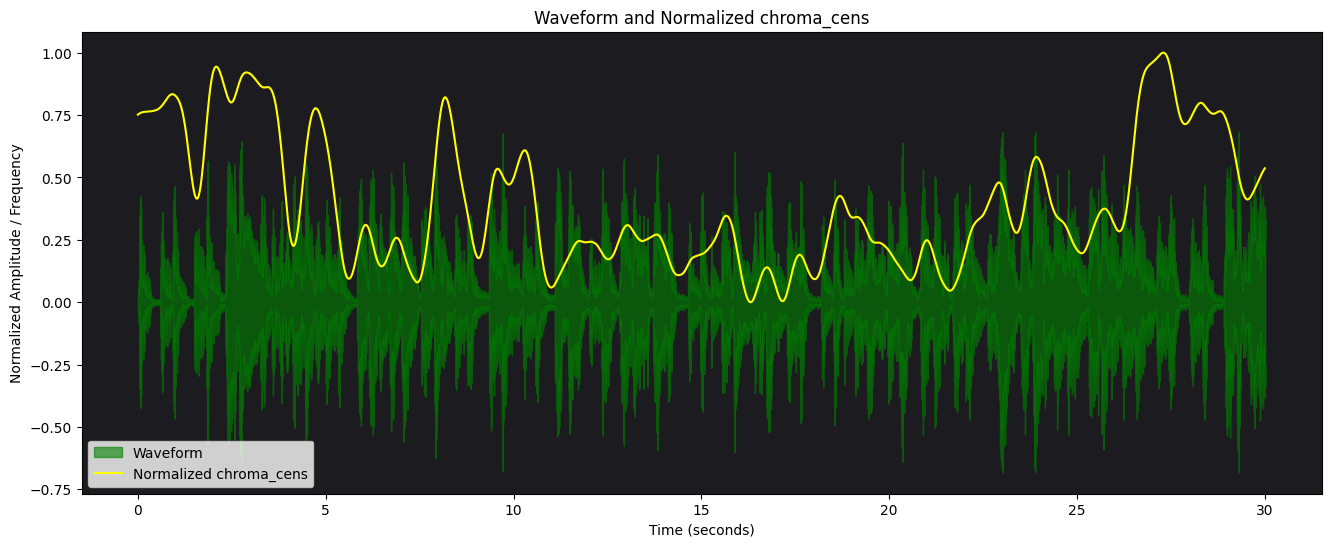

In [94]:

frames = range(len(chroma_cens[0]))
t = librosa.frames_to_time(frames, sr=sr)

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#1C1B1F') 


librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='green', label='Waveform')

plt.plot(t, normalize(chroma_cens[0]), color='yellow', label='Normalized chroma_cens')

plt.title('Waveform and Normalized chroma_cens')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Amplitude / Frequency')
plt.legend()

plt.show()

#### 1.8 Perceptual features
**Perceptual features** in audio analysis are usually related to how humans perceive sound, such as loudness, pitch, or timbre.

In [95]:
y_harm, y_perc = librosa.effects.hpss(audio)

In [97]:
y_perc.mean(),y_perc.var()

(-0.0001796235, 0.0030642096)

#### 1.9 Tempo
**Tempo**: The speed at which a piece of music is played, calculated in beats per minute (BPM).

In [98]:
tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)
tempo_mean = tempo.mean()

print("Tempo Mean (BPM):", tempo_mean)

Tempo Mean (BPM): 67.99958881578948


#### 1.10 MFCC
**MFCC (Mel Frequency Cepstral Coefficients)**: Describes the overall shape of the spectral envelope and is widely used in audio signal processing and speech recognition for timbre and speech clarity characterization.

In [101]:
mfccs = librosa.feature.mfcc(y=audio, sr=sr)
print('mfccs shape:', mfccs.shape)

mfccs shape: (20, 1293)


In [108]:
mfccs[0].mean(),mfccs[0].var()

(-207.52383, 7769.1045)

In [107]:
mfccs[1].mean(),mfccs[1].var()

(123.98514, 559.9134)

In [109]:
mfccs[19].mean(),mfccs[19].var()

(0.5306444, 45.7887)